# Convolutional Nueral Network

## Detect Skin Cancer Assignment

### Problem statement: 

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

The dataset consists of 2357 images of malignant and benign oncological diseases, which were formed from the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

#### The data set contains the following diseases:

##### Actinic keratosis
##### Basal cell carcinoma
##### Dermatofibroma
##### Melanoma
##### Nevus
##### Pigmented benign keratosis
##### Seborrheic keratosis
##### Squamous cell carcinoma
##### Vascular lesion

# 1. Reading and Understanding the Data

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential, load_model


### Map the google drive where the images are uploaded

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Read an image from the google drive and make sure there are no access issues

In [ ]:
%cd /content/gdrive/My Drive/CNN_Images/Train/melanoma

/content/gdrive/My Drive/CNN_Images/Train/melanoma


In [ ]:
from PIL import Image

# Load the image file
img = Image.open('ISIC_0010653.jpg')

# Show the image
img.show()

### Define the path of the images and check the count

In [ ]:
# Defining the path for train and test images
## Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/My Drive/CNN_Images/Train/")
data_dir_test = pathlib.Path('/content/gdrive/My Drive/CNN_Images/Test/')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# 2. Data Set Creation and Visualization

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create datasets for Training and Validation from Train folder images

Define some parameters for the loader:

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.utils.image_dataset_from_directory( 
"/content/gdrive/My Drive/CNN_Images/Train/",
labels='inferred', 
label_mode='int', 
class_names=None, 
color_mode='rgb', 
batch_size=32, 
image_size=(180, 180), 
shuffle=True,
seed=123, 
validation_split=0.2, 
subset='training', 
interpolation='bilinear', 
follow_links=False, 
crop_to_aspect_ratio=False)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Visualize the data for Training Data Set
#### Create code to visualize one instance of all the nine classes present in the dataset

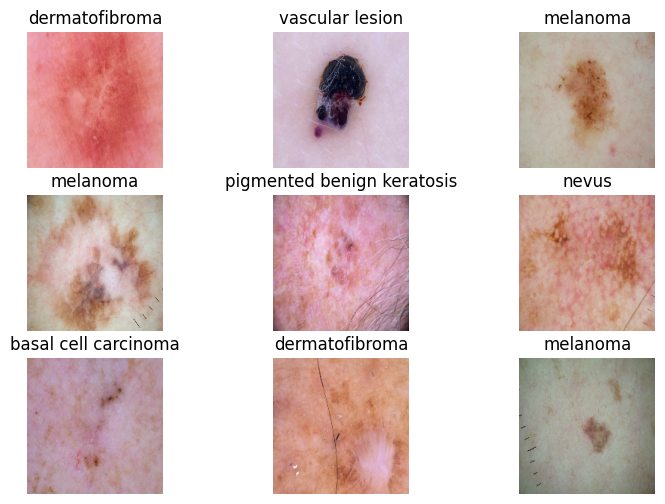

In [ ]:
#Visualize one image from each class

plt.figure(figsize=(9, 6))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(images[i].numpy().astype("uint8")) 
    plt.title(train_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/gdrive/MyDrive/CNN_Images/Train/",
    labels='inferred', 
    label_mode='int', 
    class_names=None, 
    color_mode='rgb', 
    batch_size=32, 
    image_size=(180, 180), 
    shuffle=True,
    seed=123, 
    validation_split=0.2, 
    subset='validation', 
    interpolation='bilinear', 
    follow_links=False, 
    crop_to_aspect_ratio=False
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Visualize the data for Validation Data Set
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

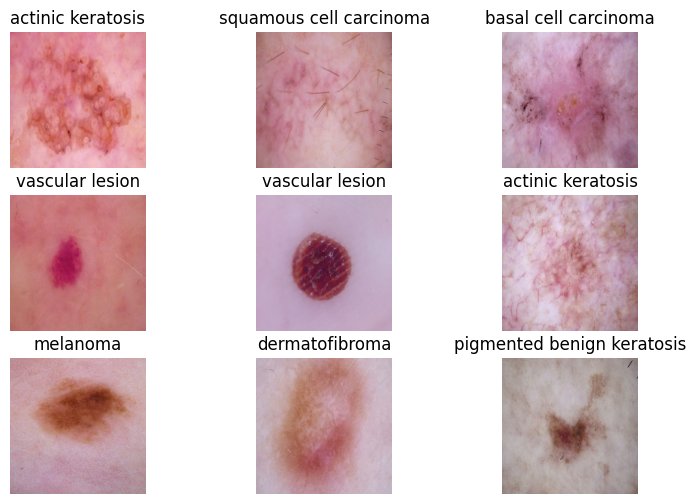

In [ ]:
#Visualize one image from each class

plt.figure(figsize=(9, 6))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(images[i].numpy().astype("uint8")) 
    plt.title(val_ds.class_names[labels[i]])
    plt.axis("off")

In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = val_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# 3. Model Building and Training

### Model 1: Create the model 
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling  to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]

In [ ]:
num_classes = 9
model = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255), 
tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Conv2D(64, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation='relu'), 
tf.keras.layers.Dense(64, activation='relu'), 
tf.keras.layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

### Train the model for 20 epochs

In [ ]:
epochs = 20 
history = model.fit(
              train_ds, 
              validation_data=val_ds,
              epochs=epochs
             )

Epoch 1/20
56/56 [==============================] - 259s 3s/step - loss: 2.0393 - accuracy: 0.1953 - val_loss: 1.9379 - val_accuracy: 0.2998
Epoch 2/20
56/56 [==============================] - 128s 2s/step - loss: 1.7656 - accuracy: 0.3622 - val_loss: 1.5838 - val_accuracy: 0.4340
Epoch 3/20
56/56 [==============================] - 125s 2s/step - loss: 1.5486 - accuracy: 0.4420 - val_loss: 1.4758 - val_accuracy: 0.4765
Epoch 4/20
56/56 [==============================] - 126s 2s/step - loss: 1.4829 - accuracy: 0.4710 - val_loss: 1.4778 - val_accuracy: 0.4966
Epoch 5/20
56/56 [==============================] - 129s 2s/step - loss: 1.4184 - accuracy: 0.5089 - val_loss: 1.4999 - val_accuracy: 0.4832
Epoch 6/20
56/56 [==============================] - 126s 2s/step - loss: 1.3633 - accuracy: 0.5106 - val_loss: 1.4877 - val_accuracy: 0.4586
Epoch 7/20
56/56 [==============================] - 125s 2s/step - loss: 1.3212 - accuracy: 0.5402 - val_loss: 1.5157 - val_accuracy: 0.4497
Epoch 8/20
56

### Visualizing training results

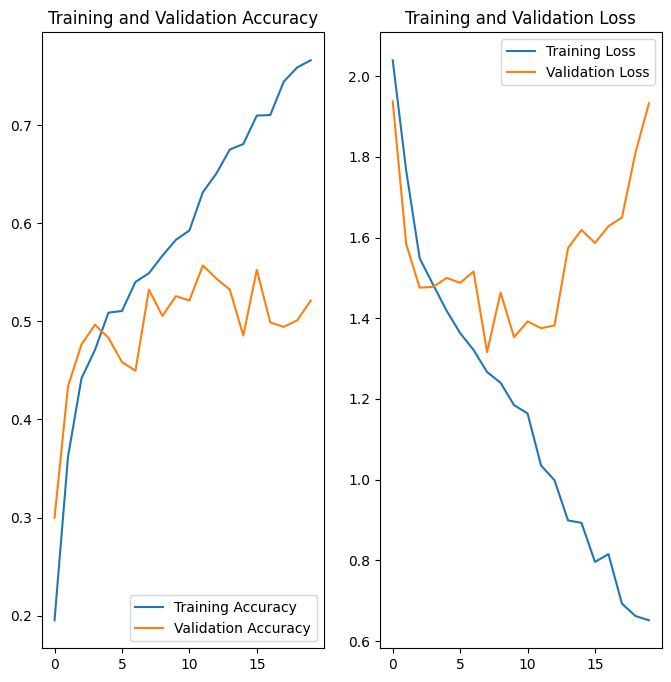

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations

The Training Accuracy and Validation Accuracy are more or less par in first few epochs from 30% to 50% and after that validation accuracy has an average of 50% but training accruacy consistently grew up to 80% on 20th Epoch. it clearly shows the **OVERFITTING** of the model.  

The Training loss and Validation Loss also shows the same pattern as  the validation loss starts to increase after it came down to 1.3. But the training loss consistently decreased, this also clearly shows the parttern of **OVERFITTING**

**Data Augumentation Strategy**

1. Need to increase the number of inputs for each class, by rotating the images to a certain degree 
2. Need to use drop out on each layer


### Model 2 : Create the model with drop outs 

In [ ]:
num_classes = 9
model_one = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255), 
tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2D(64, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation='relu'), 
tf.keras.layers.Dense(64, activation='relu'), 
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(num_classes, activation='softmax')
])

### Compile the model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model_one.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)

### Apply Data Augumentation Strategy to  the model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                                   validation_split=0.2,
                                   rotation_range=20, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   horizontal_flip=True)

validation_datagen = ImageDataGenerator( 
                                         validation_split=0.2,
                                         rotation_range=20, 
                                         width_shift_range=0.2, 
                                         height_shift_range=0.2, 
                                         horizontal_flip=True)
                                   


In [ ]:
train_generator = train_datagen.flow_from_directory( 
"/content/gdrive/MyDrive/CNN_Images/Train/",
target_size=(180, 180), 
batch_size=32,
class_mode='sparse',
subset='training'
)

Found 5395 images belonging to 9 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory( 
"/content/gdrive/MyDrive/CNN_Images/Train/",
target_size=(180, 180), 
batch_size=32,
class_mode='sparse',
subset='validation'
)

Found 1344 images belonging to 9 classes.


### Train the Model

In [ ]:
history = model_one.fit( train_generator, 
              steps_per_epoch=len(train_generator),
           epochs=30, 
           validation_data=validation_generator, 
           validation_steps=len(validation_generator))

Epoch 1/30
57/57 [==============================] - 203s 4s/step - loss: 2.1033 - accuracy: 0.1972 - val_loss: 2.0478 - val_accuracy: 0.2072
Epoch 2/30
57/57 [==============================] - 196s 3s/step - loss: 2.0608 - accuracy: 0.2056 - val_loss: 2.0722 - val_accuracy: 0.1554
Epoch 3/30
57/57 [==============================] - 200s 4s/step - loss: 2.0082 - accuracy: 0.2418 - val_loss: 1.9192 - val_accuracy: 0.3086
Epoch 4/30
57/57 [==============================] - 175s 3s/step - loss: 1.8872 - accuracy: 0.3454 - val_loss: 1.9744 - val_accuracy: 0.2500
Epoch 5/30
57/57 [==============================] - 193s 3s/step - loss: 1.7932 - accuracy: 0.3543 - val_loss: 1.7525 - val_accuracy: 0.3243
Epoch 6/30
57/57 [==============================] - 181s 3s/step - loss: 1.7064 - accuracy: 0.3972 - val_loss: 1.8466 - val_accuracy: 0.3086
Epoch 7/30
57/57 [==============================] - 193s 3s/step - loss: 1.6778 - accuracy: 0.3933 - val_loss: 1.7838 - val_accuracy: 0.3288
Epoch 8/30
57

### Visualize the Results

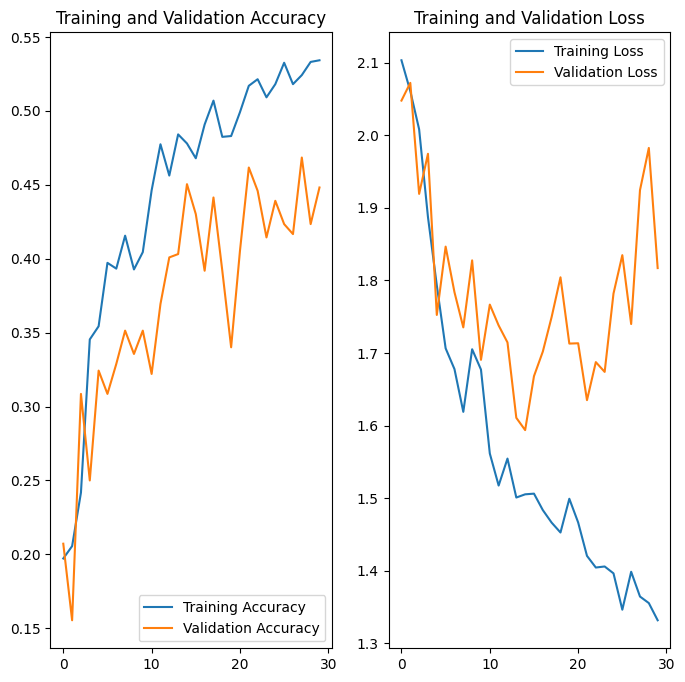

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations

After adding the Drop out Layer, Overfitting is greatly reduced as seen in the Training Accuracy vs Validation Accuracy.

But, the Validation Loss tend to increase when the number of epochs are increased, this tends to show there is still Overfitting present in the model

Also, the accuracy of this model is pretty low, as the validation accuracy is below 50%, we need to increase the number of inputs for both Training Dataset and Validation Data set as well need to add more layers to increase accuracy

#### Find out the distribution of classes in training data set 

In [ ]:
class_distribution = train_generator.classes

In [ ]:
class_count = np.unique(class_distribution, return_counts=True)
print(class_count)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([492, 701, 476, 751, 686, 770, 462, 545, 512]))


### Handle Class Imbalances with Augmentor

#### Install Augmentor

In [ ]:
pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### Add 1000 images per Class

In [ ]:
path_to_training_dataset="/content/gdrive/My Drive/CNN_Images/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8C6DF26A0>: 100%|██████████| 500/500 [00:36<00:00, 13.77 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8C6DA4100>: 100%|██████████| 500/500 [00:34<00:00, 14.63 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8C6D90C10>: 100%|██████████| 500/500 [00:30<00:00, 16.56 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8C6DA0C70>: 100%|██████████| 500/500 [02:15<00:00,  3.70 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536 at 0x7FB8C6D77C70>: 100%|██████████| 500/500 [02:11<00:00,  3.80 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8C6790F40>: 100%|██████████| 500/500 [00:30<00:00, 16.39 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FB8C6E6D3A0>: 100%|██████████| 500/500 [01:03<00:00,  7.93 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FB8C6D640D0>: 100%|██████████| 500/500 [00:27<00:00, 18.43 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/My Drive/CNN_Images/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FB8C6D5FC70>: 100%|██████████| 500/500 [00:28<00:00, 17.68 Samples/s]


#### Print total number of Images added for 9 classes

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

9000


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028558.jpg_3d1e8ebf-13c1-4dd7-8717-a2ee630a4aaa.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029460.jpg_4e82a323-df49-4d23-8339-63fccb59da14.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0028314.jpg_fa92443e-c10a-4c2e-bef1-12c0a9e93a02.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031993.jpg_ffaa17a8-8aa1-45f2-935c-05664575ca05.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0031108.jpg_3e7a7765-8e5b-4b74-a8ab-031cd350f786.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0030655.jpg_c9b29674-45c9-4964-b84a-74a1f2c31a97.jpg',
 '/content/gdrive/My Drive/CNN_Images/Train/actinic keratosis/ou

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2

#### Print number of images added for each class

In [ ]:
new_df['Label'].value_counts()

actinic keratosis             1000
nevus                         1000
seborrheic keratosis          1000
dermatofibroma                1000
vascular lesion               1000
squamous cell carcinoma       1000
basal cell carcinoma          1000
pigmented benign keratosis    1000
melanoma                      1000
Name: Label, dtype: int64

So, now we have added 1000 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Model 3: Create model with new dataset that has class imbalance handled

### Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [ ]:
data_dir_train="/content/gdrive/My Drive/CNN_Images/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


#### Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


#### Create the model 

In [ ]:
num_classes = 9
model_two = tf.keras.Sequential([
tf.keras.layers.Rescaling(1./255), 
tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2D(64, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Conv2D(32, 3, activation='relu'), 
tf.keras.layers.MaxPooling2D(), 
tf.keras.layers.Dropout(0.25),

tf.keras.layers.Flatten(), 
tf.keras.layers.Dense(128, activation='relu'), 
tf.keras.layers.Dense(64, activation='relu'), 
tf.keras.layers.Dropout(0.5),
tf.keras.layers.Dense(num_classes, activation='softmax')
])

#### Compile the Model

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model_two.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
    metrics=['accuracy']
)


#### Train the Model with 30 epochs

In [ ]:
epochs = 30
history = model_two.fit(
              train_ds, 
              validation_data=val_ds,
              
              epochs=epochs
             )

Epoch 1/30
281/281 [==============================] - 889s 3s/step - loss: 2.1919 - accuracy: 0.1341 - val_loss: 2.1434 - val_accuracy: 0.1851
Epoch 2/30
281/281 [==============================] - 765s 3s/step - loss: 1.8425 - accuracy: 0.2868 - val_loss: 1.6356 - val_accuracy: 0.3850
Epoch 3/30
281/281 [==============================] - 753s 3s/step - loss: 1.6251 - accuracy: 0.3672 - val_loss: 1.4726 - val_accuracy: 0.4419
Epoch 4/30
281/281 [==============================] - 752s 3s/step - loss: 1.4914 - accuracy: 0.4098 - val_loss: 1.4255 - val_accuracy: 0.4326
Epoch 5/30
281/281 [==============================] - 757s 3s/step - loss: 1.4108 - accuracy: 0.4525 - val_loss: 1.3150 - val_accuracy: 0.4757
Epoch 6/30
281/281 [==============================] - 755s 3s/step - loss: 1.3378 - accuracy: 0.4822 - val_loss: 1.2500 - val_accuracy: 0.5118
Epoch 7/30
281/281 [==============================] - 745s 3s/step - loss: 1.2706 - accuracy: 0.5032 - val_loss: 1.2425 - val_accuracy: 0.5207

#### Visualize the Results

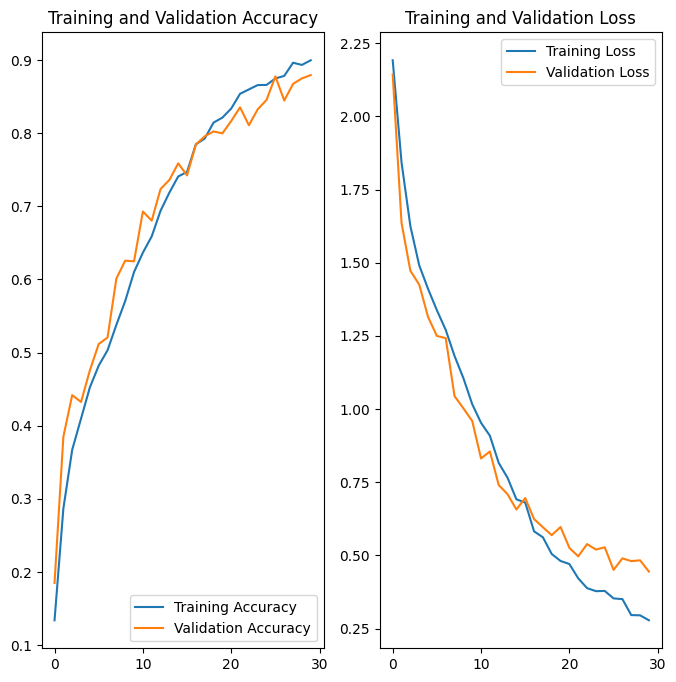

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings / Observations

1. Overfitting and Underfitting are removed from the chart shown above. 
2. Training Accuracy 89.97% and Validation Accuracy 87.94%. Tremendous progress has been made in this model.
3. Training Loss 27.85% and Validation loss 44.47%. Loss have been significantly decreased.
4. After addressing the Class Imbalance, overall model performance, increased significantly.